In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

0.15625


/home/ammathes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in double_scalars
/home/ammathes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

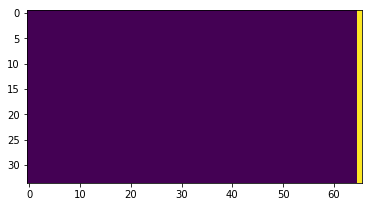

In [102]:
#Section 1.2: Jacobian Relaxation

def boundary(u):
    u[:,0]  = 0.0
    u[0,:]  = 0.0
    u[-1,:] = 0.0
    u[:,-1] = 100.0
    return u

def cfl(h, c=1.):
    dt = h / (2*c)
    return dt
    
#Set up the grids
h = 5.0/16
xdim = 20.0
ydim = 10.0
Nx = int(xdim/h)
Ny = int(ydim/h)
u = np.zeros((Ny+2,Nx+2))

#Initialize
dt = cfl(h)
u_new = np.zeros_like(u)
u = boundary(u)
plt.figure(0)
plt.imshow(u)
print(dt)

for t in range(10000):
    for j in range(1,Nx+1):
        for i in range(1,Ny+1):
            u_new[i,j] = u[i,j] + (dt/h**2) * (u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] - 2*u[i,j] + u[i,j-1])
    u = u_new
    u = boundary(u)
    
plt.figure(1)
plt.imshow(u)
plt.colorbar()

/home/ammathes/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in double_scalars
/home/ammathes/miniconda3/lib/python3.6/site-packages/matplotlib/colorbar.py:632: RuntimeWarning: overflow encountered in add
  + self._boundaries[1:])
/home/ammathes/miniconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1747: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


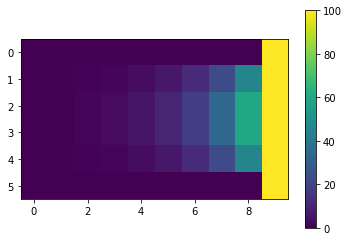

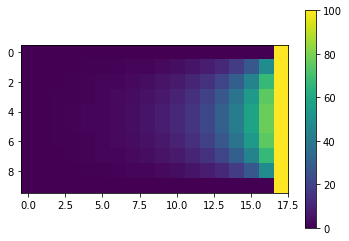

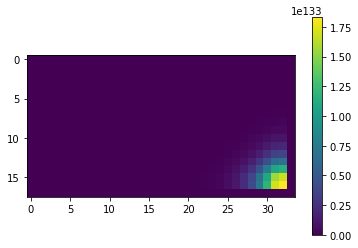

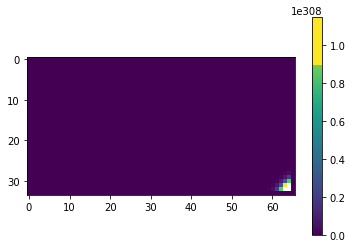

In [93]:
# Jacobian relaxation, higher resolutions
#plt.figure(8)
#fig, ax = plt.subplots(2,2, sharex=True, sharey=True)

for d in range(4):
    h = 5.0 / (2**(d+1))
    xdim = 20.0
    ydim = 10.0
    Nx = int(xdim/h)
    Ny = int(ydim/h)
    u = np.zeros((Ny+2,Nx+2))
    dt = cfl(h)
    u_new = np.zeros_like(u)
    u = boundary(u)
    
    for t in range(200):
        u = boundary(u)
        for j in range(1,Nx+1):
            for i in range(1,Ny+1):
                u_new[i,j] = u[i,j] + (dt/h**2) * (u[i+1,j] - 2*u[i,j] + u[i-1,j] + u[i,j+1] - 2*u[i,j] + u[i,j-1])
        u = u_new
      
    plt.figure(d)
    plt.imshow(u)
    plt.colorbar()
    #ax[d//2,d%2] = plt.imshow(u)